In [1]:
!python -m pip install --user --upgrade pip
!pip install --user keras
!pip install --user tensorflow
!pip install --user -U numpy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\d7\de\2e\efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built termcolor absl-py wrapt gast


ERROR: tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Requirement already up-to-date: numpy in c:\users\mayingzh\appdata\roaming\python\python36\site-packages (1.16.4)


In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load data and do data normalization

In [24]:
df = pd.read_csv('Cleaned_withoutNaN_2.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [29]:
df = df[df['Value'].notnull()]

In [30]:
df.head()

,The Date of this Price,Expiration Date of the Option,Strike Price,Lowest Closing Ask Across All Exchanges,Underlying Price,volatility,Value,Maturity,"C=Call, P=Put_C","C=Call, P=Put_P"
0,2012-09-04,2012-09-07,590.0,85.50,674.97,0.174659,0.001,3,1,0
1,2012-09-04,2012-09-07,595.0,80.80,674.97,0.174659,0.001,3,1,0
2,2012-09-04,2012-09-07,600.0,75.15,674.97,0.174659,0.001,3,1,0
3,2012-09-04,2012-09-07,605.0,70.70,674.97,0.174659,0.001,3,1,0
4,2012-09-04,2012-09-07,610.0,65.45,674.97,0.174659,0.001,3,1,0


In [31]:
y = df['Lowest  Closing Ask Across All Exchanges'].values
X = df[['Strike Price', 'Underlying Price', 'volatility', 'Maturity', 'Value', 'C=Call, P=Put_C', 'C=Call, P=Put_P']]
#df.drop(['Lowest  Closing Ask Across All Exchanges'], axis = 1, inplace = True)

In [32]:
# Normalize the data to build a regression neural network model
sc= preprocessing.MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)

(828205, 7)
(828205, 1)


In [8]:
#XX_train, XX_validation, yy_train, yy_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Build a keras Sequential model

In [35]:
# Built Keras sequential model with 3 hidden layer, and after the first hidden layer, dropout 25% neurons.
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

In [36]:
# Enable early stopping based on the loss of validation data
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=50)

In [37]:
# Because it is a simple regression problem, we should custom metrics function
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [38]:
# use mean_squared_error to compile regression model loss
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)

In [39]:
# fit the model
result = model.fit(X_train, 
                   y_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks = [es]
                  )

Train on 828205 samples, validate on 207052 samples
Epoch 1/200
828205/828205 [==============================] - 5s 6us/step - loss: 3.2589e-04 - rmse: 0.0072 - r_square: 0.9891 - val_loss: 5.3931e-05 - val_rmse: 0.0053 - val_r_square: 0.9982
Epoch 2/200
828205/828205 [==============================] - 4s 5us/step - loss: 2.8368e-05 - rmse: 0.0036 - r_square: 0.9990 - val_loss: 9.2863e-06 - val_rmse: 0.0022 - val_r_square: 0.9997
Epoch 3/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.4629e-05 - rmse: 0.0029 - r_square: 0.9995 - val_loss: 1.4833e-05 - val_rmse: 0.0032 - val_r_square: 0.9995
Epoch 4/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.3540e-05 - rmse: 0.0026 - r_square: 0.9995 - val_loss: 1.6059e-05 - val_rmse: 0.0033 - val_r_square: 0.9995
Epoch 5/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.1115e-05 - rmse: 0.0024 - r_square: 0.9996 - val_loss: 8.7013e-06 - val_rmse: 0.0022 - val_r_square: 

828205/828205 [==============================] - 5s 6us/step - loss: 2.4632e-06 - rmse: 0.0011 - r_square: 0.9999 - val_loss: 3.2479e-06 - val_rmse: 0.0013 - val_r_square: 0.9999
Epoch 44/200
828205/828205 [==============================] - 4s 5us/step - loss: 2.4217e-06 - rmse: 0.0011 - r_square: 0.9999 - val_loss: 2.3729e-06 - val_rmse: 0.0011 - val_r_square: 0.9999
Epoch 45/200
828205/828205 [==============================] - 4s 5us/step - loss: 2.4153e-06 - rmse: 0.0011 - r_square: 0.9999 - val_loss: 4.6714e-06 - val_rmse: 0.0016 - val_r_square: 0.9998
Epoch 46/200
828205/828205 [==============================] - 4s 5us/step - loss: 2.4201e-06 - rmse: 0.0011 - r_square: 0.9999 - val_loss: 2.3887e-06 - val_rmse: 0.0011 - val_r_square: 0.9999
Epoch 47/200
828205/828205 [==============================] - 4s 5us/step - loss: 2.3544e-06 - rmse: 0.0011 - r_square: 0.9999 - val_loss: 1.9893e-06 - val_rmse: 0.0011 - val_r_square: 0.9999
Epoch 48/200
828205/828205 [=========================

828205/828205 [==============================] - 4s 5us/step - loss: 1.7676e-06 - rmse: 9.5261e-04 - r_square: 0.9999 - val_loss: 2.0906e-06 - val_rmse: 0.0011 - val_r_square: 0.9999
Epoch 86/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.7482e-06 - rmse: 9.4293e-04 - r_square: 0.9999 - val_loss: 1.9986e-06 - val_rmse: 0.0010 - val_r_square: 0.9999
Epoch 87/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.7186e-06 - rmse: 9.3518e-04 - r_square: 0.9999 - val_loss: 1.2737e-06 - val_rmse: 8.1876e-04 - val_r_square: 1.0000
Epoch 88/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.7343e-06 - rmse: 9.4057e-04 - r_square: 0.9999 - val_loss: 3.2291e-06 - val_rmse: 0.0013 - val_r_square: 0.9999
Epoch 89/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.7155e-06 - rmse: 9.3569e-04 - r_square: 0.9999 - val_loss: 1.5804e-06 - val_rmse: 9.0855e-04 - val_r_square: 0.9999
Epoch 90/200
828205/82820

828205/828205 [==============================] - 4s 5us/step - loss: 1.4776e-06 - rmse: 8.6894e-04 - r_square: 0.9999 - val_loss: 1.0860e-06 - val_rmse: 7.4061e-04 - val_r_square: 1.0000
Epoch 127/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.5125e-06 - rmse: 8.7656e-04 - r_square: 0.9999 - val_loss: 1.8893e-06 - val_rmse: 9.8516e-04 - val_r_square: 0.9999
Epoch 128/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.4770e-06 - rmse: 8.6586e-04 - r_square: 0.9999 - val_loss: 1.9260e-06 - val_rmse: 0.0010 - val_r_square: 0.9999
Epoch 129/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.4487e-06 - rmse: 8.6035e-04 - r_square: 1.0000 - val_loss: 1.2120e-06 - val_rmse: 7.8755e-04 - val_r_square: 1.0000
Epoch 130/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.4442e-06 - rmse: 8.5599e-04 - r_square: 1.0000 - val_loss: 1.7751e-06 - val_rmse: 9.7791e-04 - val_r_square: 0.9999
Epoch 131/200

828205/828205 [==============================] - 4s 5us/step - loss: 1.3260e-06 - rmse: 8.2314e-04 - r_square: 1.0000 - val_loss: 1.6272e-06 - val_rmse: 9.1657e-04 - val_r_square: 0.9999
Epoch 168/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.3219e-06 - rmse: 8.1918e-04 - r_square: 1.0000 - val_loss: 1.0479e-06 - val_rmse: 7.3202e-04 - val_r_square: 1.0000
Epoch 169/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.3580e-06 - rmse: 8.2942e-04 - r_square: 1.0000 - val_loss: 9.4361e-07 - val_rmse: 6.8010e-04 - val_r_square: 1.0000
Epoch 170/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.3185e-06 - rmse: 8.1606e-04 - r_square: 1.0000 - val_loss: 1.6328e-06 - val_rmse: 9.2178e-04 - val_r_square: 0.9999
Epoch 171/200
828205/828205 [==============================] - 4s 5us/step - loss: 1.3073e-06 - rmse: 8.1571e-04 - r_square: 1.0000 - val_loss: 1.0404e-06 - val_rmse: 7.2663e-04 - val_r_square: 1.0000
Epoch 172

In [24]:
model.save_weights('model.h5')

In [40]:
predictions = model.predict(X_test)
pre_act = sc.inverse_transform(predictions)
y_act = sc.inverse_transform(y_test)
print(pre_act[:10])

[[  3.0357647]
 [  7.629406 ]
 [  0.880803 ]
 [  9.843321 ]
 [101.22771  ]
 [246.6744   ]
 [ 65.10281  ]
 [207.85027  ]
 [ 21.172096 ]
 [ 13.6375065]]


In [44]:
y_act[:10]

array([[  2.86],
       [  7.55],
       [  1.03],
       [  9.3 ],
       [100.  ],
       [247.25],
       [ 64.4 ],
       [206.8 ],
       [ 26.05],
       [ 14.35]])

## Plot learning curves including R^2 and RMSE

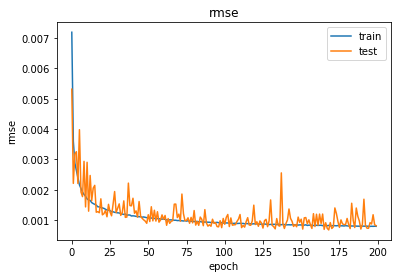

In [41]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

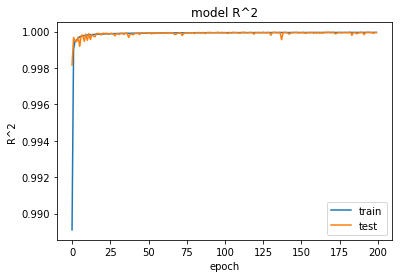

In [42]:
# plot training curve for R^2
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [43]:
import sklearn.metrics as skm, math
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act))



Mean absolute error (MAE):      0.552527
Mean squared error (MSE):       0.600395
Root mean squared error (RMSE): 0.774851
R square (R^2):                 0.999956


## Try dropout

In [45]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model2.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result2 = model2.fit(X_train, 
                   y_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks = [es]
                  )

Train on 828205 samples, validate on 207052 samples
Epoch 1/200
828205/828205 [==============================] - 5s 6us/step - loss: 0.0011 - rmse: 0.0161 - r_square: 0.9646 - val_loss: 7.2390e-04 - val_rmse: 0.0166 - val_r_square: 0.9758
Epoch 2/200
828205/828205 [==============================] - 5s 6us/step - loss: 9.0424e-05 - rmse: 0.0063 - r_square: 0.9969 - val_loss: 0.0013 - val_rmse: 0.0258 - val_r_square: 0.9552
Epoch 3/200
828205/828205 [==============================] - 5s 6us/step - loss: 4.5156e-05 - rmse: 0.0045 - r_square: 0.9985 - val_loss: 0.0016 - val_rmse: 0.0287 - val_r_square: 0.9475
Epoch 4/200
828205/828205 [==============================] - 5s 6us/step - loss: 3.2496e-05 - rmse: 0.0038 - r_square: 0.9989 - val_loss: 0.0015 - val_rmse: 0.0274 - val_r_square: 0.9494
Epoch 5/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.3164e-05 - rmse: 0.0033 - r_square: 0.9992 - val_loss: 0.0016 - val_rmse: 0.0277 - val_r_square: 0.9472
Epoch 6/200
8

828205/828205 [==============================] - 5s 6us/step - loss: 6.2180e-06 - rmse: 0.0017 - r_square: 0.9998 - val_loss: 0.0011 - val_rmse: 0.0248 - val_r_square: 0.9613
Epoch 45/200
828205/828205 [==============================] - 5s 6us/step - loss: 6.0765e-06 - rmse: 0.0017 - r_square: 0.9998 - val_loss: 0.0011 - val_rmse: 0.0235 - val_r_square: 0.9644
Epoch 46/200
828205/828205 [==============================] - 5s 6us/step - loss: 6.5312e-06 - rmse: 0.0017 - r_square: 0.9998 - val_loss: 0.0011 - val_rmse: 0.0238 - val_r_square: 0.9639
Epoch 47/200
828205/828205 [==============================] - 5s 6us/step - loss: 5.7860e-06 - rmse: 0.0016 - r_square: 0.9998 - val_loss: 0.0011 - val_rmse: 0.0243 - val_r_square: 0.9633
Epoch 48/200
828205/828205 [==============================] - 5s 6us/step - loss: 7.5161e-06 - rmse: 0.0017 - r_square: 0.9997 - val_loss: 0.0011 - val_rmse: 0.0241 - val_r_square: 0.9633
Epoch 49/200
828205/828205 [==============================] - 5s 6us/step

In [46]:
predictions2 = model2.predict(X_test)
pre_act_2 = sc.inverse_transform(predictions2)
print(pre_act_2[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act_2))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act_2))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act_2)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act_2))

[[  2.5129986]
 [ 21.123335 ]
 [  1.4793724]
 [  8.794034 ]
 [128.70859  ]
 [263.5434   ]
 [ 49.767467 ]
 [177.5032   ]
 [ 15.492077 ]
 [ 26.267944 ]]


Mean absolute error (MAE):      16.084057
Mean squared error (MSE):       489.496359
Root mean squared error (RMSE): 22.124565
R square (R^2):                 0.964373


## Try batch normalization technique to regularize neurons

In [47]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential([
    BatchNormalization(),
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model3.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result3 = model3.fit(X_train, 
                   y_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks = [es]
                  )

Train on 828205 samples, validate on 207052 samples
Epoch 1/200
828205/828205 [==============================] - 5s 6us/step - loss: 7.4824e-04 - rmse: 0.0170 - r_square: 0.9748 - val_loss: 1.1173e-04 - val_rmse: 0.0082 - val_r_square: 0.9962
Epoch 2/200
828205/828205 [==============================] - 5s 6us/step - loss: 4.2099e-04 - rmse: 0.0130 - r_square: 0.9857 - val_loss: 2.0923e-04 - val_rmse: 0.0108 - val_r_square: 0.9929
Epoch 3/200
828205/828205 [==============================] - 5s 6us/step - loss: 3.9674e-04 - rmse: 0.0123 - r_square: 0.9866 - val_loss: 2.4948e-04 - val_rmse: 0.0059 - val_r_square: 0.9918
Epoch 4/200
828205/828205 [==============================] - 5s 6us/step - loss: 3.7015e-04 - rmse: 0.0119 - r_square: 0.9874 - val_loss: 6.1095e-05 - val_rmse: 0.0052 - val_r_square: 0.9980
Epoch 5/200
828205/828205 [==============================] - 5s 6us/step - loss: 3.6446e-04 - rmse: 0.0117 - r_square: 0.9877 - val_loss: 4.8681e-05 - val_rmse: 0.0046 - val_r_square: 

828205/828205 [==============================] - 5s 6us/step - loss: 2.9650e-04 - rmse: 0.0106 - r_square: 0.9899 - val_loss: 1.9317e-05 - val_rmse: 0.0031 - val_r_square: 0.9993
Epoch 44/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.8757e-04 - rmse: 0.0106 - r_square: 0.9902 - val_loss: 1.8740e-05 - val_rmse: 0.0030 - val_r_square: 0.9994
Epoch 45/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.9029e-04 - rmse: 0.0105 - r_square: 0.9902 - val_loss: 2.7075e-05 - val_rmse: 0.0037 - val_r_square: 0.9991
Epoch 46/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.8706e-04 - rmse: 0.0105 - r_square: 0.9903 - val_loss: 4.8878e-05 - val_rmse: 0.0051 - val_r_square: 0.9984
Epoch 47/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.9769e-04 - rmse: 0.0106 - r_square: 0.9899 - val_loss: 5.0055e-05 - val_rmse: 0.0050 - val_r_square: 0.9983
Epoch 48/200
828205/828205 [=========================

Epoch 86/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.8957e-04 - rmse: 0.0105 - r_square: 0.9902 - val_loss: 1.6515e-05 - val_rmse: 0.0028 - val_r_square: 0.9994
Epoch 87/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.8190e-04 - rmse: 0.0105 - r_square: 0.9904 - val_loss: 2.2233e-05 - val_rmse: 0.0030 - val_r_square: 0.9993
Epoch 88/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.8614e-04 - rmse: 0.0104 - r_square: 0.9903 - val_loss: 3.5048e-05 - val_rmse: 0.0044 - val_r_square: 0.9988
Epoch 89/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.8992e-04 - rmse: 0.0105 - r_square: 0.9902 - val_loss: 7.0878e-05 - val_rmse: 0.0058 - val_r_square: 0.9976
Epoch 90/200
828205/828205 [==============================] - 5s 6us/step - loss: 2.8102e-04 - rmse: 0.0105 - r_square: 0.9905 - val_loss: 3.5079e-05 - val_rmse: 0.0040 - val_r_square: 0.9988
Epoch 91/200
828205/828205 [============

In [49]:
predictions3 = model3.predict(X_test)
pre_act_3 = sc.inverse_transform(predictions3)
print(pre_act_3[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act_3))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act_3))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act_3)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act_3))

[[  5.099005 ]
 [  8.367201 ]
 [  0.8974564]
 [  8.664426 ]
 [ 96.953476 ]
 [237.70483  ]
 [ 61.601765 ]
 [202.17596  ]
 [ 19.617977 ]
 [ 13.987272 ]]


Mean absolute error (MAE):      2.523942
Mean squared error (MSE):       14.312753
Root mean squared error (RMSE): 3.783220
R square (R^2):                 0.998958


## Reference: 
&emsp;&emsp;What does 'Accuracy' mean in Regression? https://github.com/keras-team/keras/issues/7947 <br>
&emsp;&emsp;https://keras.io/metrics/<br>
&emsp;&emsp;Scale, Standardize, or Normalize with Scikit-Learn https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 <br>
&emsp;&emsp;The Day my Computer Won the Nobel Prize (Neural Network Option Pricing)  https://medium.com/datadriveninvestor/the-day-my-computer-won-the-nobel-prize-neural-network-option-pricing-d29b4379f1d2 <br>